<a href="https://colab.research.google.com/github/shokoufehnaseri/Text-Mining/blob/main/text_mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment analysis of tweet data**

 

## ***1. Introduction***

Sentiment analysis, a key technique in natural language processing (NLP), has gained substantial attention for its ability to analyze and interpret opinions, emotions, and attitudes expressed in textual data. In recent years, the development of transformer models, such as FinBERT, has revolutionized the field of sentiment analysis, particularly in the context of financial data. These models, built on deep learning architectures like BERT, have demonstrated a remarkable ability to understand the nuances of language and context, making them particularly effective for analyzing specialized datasets such as financial news and social media content.

This project explores the performance of modern transformer models, specifically FinBERT, in comparison with traditional sentiment analysis methods like Support Vector Machines (SVM). While SVM has long been a popular choice for text classification tasks, its reliance on manual feature extraction and limited ability to capture contextual information poses certain challenges. In contrast, transformer models, with their self-attention mechanism, excel in capturing context and meaning from large amounts of unstructured data.

The dataset used for this study consists of tweets related to the S&P 500 index, a stock market index tracking the 500 largest publicly traded companies in the United States. Social media platforms like Twitter have become a rich source of real-time information, with users frequently sharing their opinions and reactions to market events. By analyzing these tweets, this project aims to uncover insights into market sentiment and compare the effectiveness of modern and traditional sentiment analysis techniques



## ***2. Data***

**Data Description:**

The Twitter raw data was downloaded using the Twitter REST API search, specifically the "Tweepy (version 3.8.0)" Python package, which simplifies the interaction between the REST API and developers. The Twitter REST API retrieves data from the past seven days and allows filtering by language. The tweets were filtered for the English (en) language.

Data collection was performed from April 9 to July 16, 2020, using the following Twitter tags as search parameters: #SPX500, #SP500, SPX500, SP500, $SPX, #stocks, $MSFT, $AAPL, $AMZN, $FB, $BBRK.B, $GOOG, $JNJ, $JPM, $V, $PG, $MA, $INTC, $UNH, $BAC, $T, $HD, $XOM, $DIS, $VZ, $KO, $MRK, $CMCSA, $CVX, $PEP, $PFE. Due to the large volume of data, I stored only each tweet's content and creation date.

The file tweets_labelled_09042020_16072020.csv consists of 5,000 tweets selected using random sampling from a total of 943,672. Of these, 1,300 tweets were manually annotated and reviewed by a second independent annotator. The file tweets_remaining_09042020_16072020.csv contains the remaining 938,672 tweets.



**Importing Libraries**

In [230]:
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from nltk import word_tokenize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

***Loading Dataset*** 

In [231]:
tweet_data = pd.read_csv(r"C:\Users\Shokoufeh\OneDrive\Thesis\thesis_coding\text_mining_project\Text-Mining\tweets_labelled_09042020_16072020.csv", delimiter=";")

**Inspect the Data**

Check for issues like missing values or incorrectly formatted columns.


In [232]:
print(tweet_data.head())

       id                 created_at  \
0   77522  2020-04-15 01:03:46+00:00   
1  661634  2020-06-25 06:20:06+00:00   
2  413231  2020-06-04 15:41:45+00:00   
3  760262  2020-07-03 19:39:35+00:00   
4  830153  2020-07-09 14:39:14+00:00   

                                                text sentiment  
0  RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...  positive  
1  #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...  negative  
2  Net issuance increases to fund fiscal programs...  positive  
3  RT @bentboolean: How much of Amazon's traffic ...  positive  
4  $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...  positive  


In [233]:
print(tweet_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5000 non-null   int64 
 1   created_at  5000 non-null   object
 2   text        5000 non-null   object
 3   sentiment   1300 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB
None


In [234]:
tweet_data['sentiment'].value_counts()

sentiment
positive    528
neutral     424
negative    348
Name: count, dtype: int64

In [235]:
print(tweet_data.isnull().sum())

id               0
created_at       0
text             0
sentiment     3700
dtype: int64


The dataset consists of 5,000 observations. Among these, 1,300 observations are labeled with sentiments as 'positive', 'negative', or 'neutral', while the remaining 3,700 observations are unlabeled, with their sentiment marked as `NaN`.

**Clean the Text Data**

In [236]:
print(tweet_data['text'].head())

0    RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...
1    #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...
2    Net issuance increases to fund fiscal programs...
3    RT @bentboolean: How much of Amazon's traffic ...
4    $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...
Name: text, dtype: object



As observed, raw text data often contains noise and inconsistencies that can impede accurate sentiment analysis. To address this, preprocessing is an essential step to clean, standardize, and structure the data, ensuring its suitability for machine learning algorithms. The following steps are commonly employed to prepare textual data effectively:

*Lowercasing:* All text is converted to lowercase to ensure uniformity and avoid treating the same word differently due to capitalization (e.g., "Happy" vs. "happy").

*Removal of URLs:* Text often contains hyperlinks that do not contribute to the sentiment of the content. These are removed to reduce noise.

*Remove Mentions:* Mentions, typically denoted by the @ symbol followed by a username (e.g., @user), are common in social media text. While they indicate a reference to another user, they usually do not contribute to the sentiment of the text and are removed to reduce noise.

*Handling Hashtags:* Hashtags are common in social media text. While the # symbol is removed, the associated words are retained, as they may provide context or sentiment-related information.

*Removal of Numeric and Punctuation Data:* Numbers and punctuation marks, unless contextually relevant, are removed to simplify the text.

Perform text preprocessing to ensure consistency and remove noise.

In [237]:
import preprocess_tweet

In [238]:
tweet_data = preprocess_tweet.Preprocess_Tweets(tweet_data)

In [239]:
tweet_data.head()

,id,created_at,text,sentiment,Text_Cleaned
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive,rt robertbeadles yo enter to win monarch token...
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative,srilanka surcharge on fuel removed the surchar...
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive,net issuance increases to fund fiscal programs...
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive,rt bentboolean how much of amazons traffic is ...
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,amd ryzen desktop cpus looking great and on tr...


### **Remove Stop Words**
Remove common words that don't contribute to sentiment.

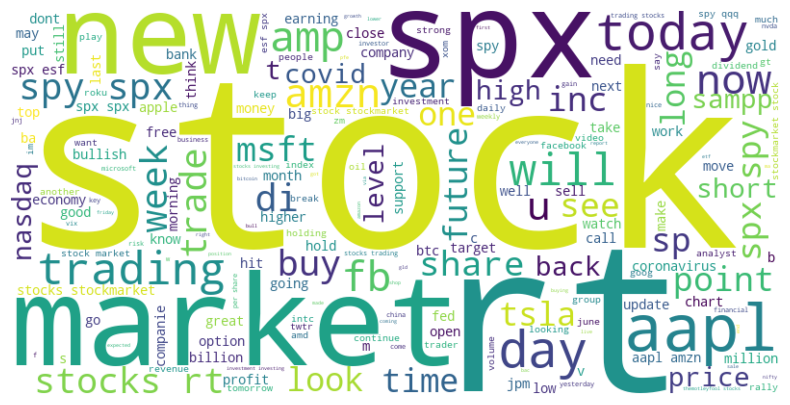

In [240]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the Series to a single string
text_string = " ".join(tweet_data['Text_Cleaned'].dropna())  # Drop NaN values if any

# Generate the word cloud
wordcloud_before_stopword = WordCloud(width=800, height=400, background_color='white').generate(text_string)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_before_stopword, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.show()


In [241]:
from nltk.corpus import stopwords

# General English stop words
general_stop_words = set(stopwords.words('english'))

# Define custom stopwords
custom_stopwords = set([
    'SP500', 'S&P', '500', 'index', 'u', 'us','trade', 'markets', 'amp','stockmarket', 'stock', 'market', 'stocks',
    'trading', 'finance', 'investing', 'investor', 'business',
    "billion", 'price', 'StockMarket', 'share',
    'RT', 'http','dollar','dollars', 'percent', 'https', 'www', 'bit.ly', '@username', '#finance',
    'breaking', 'update', 'today', 'yesterday', 'tomorrow',  "aapl", "msft", "amzn", "tsla", "googl", "meta", "nvda", "brk.b", "jnj", "pg", 
    "v", "unh", "hd", "ma", "pep", "bac", "xom", "ko", "abbv", "avgo", "cost", 
    "mcd", "csco", "pfe", "cvx", "adbe", "mrk", "nflx", "dis", "intc", "wmt", 
    "tmo", "orcl", "crm", "nke", "wfc", "acn", "lin", "mdt", "txn", "dhr", "hon", 
    "lly", "vz", "schw", "amgn", "ibm", "t", "qcom", "sbux", "mmm", "gs", "rtx", 
    "ups", "low", "bmy", "cat", "spgi", "isrg", "c", "elv", "lmt", "mo", "bkng", 
    "adp", "amd", "de", "pm", "gild", "syk", "ge", "amt", "ms", "blk", "cci", 
    "cvs", "now", "intu", "ci", "zts", "eqix", "ice", "tgt", "mu", "fis", "ew", 
    "cb", "mmc", "apd", "cl", "so", "pgr", "duke", "pld", "aon", "fisv", "itw", 
    "stz", "regn", "adi", "hum", "exc", "pxd", "snps", "cop", "kdp", "kmb", "rop", 
    "etn", "aep", "eog", "mar", "atvi", "noc", "pru", "oxy", "orly", "d", "chrw", 
    "bax", "adm", "fdx", "aig", "dg", "tsco", "qqq", "fb", "spx", "spy","new", "day", "week", "rt"
])

# Combine general_stop_words with custom stopwords
combined_stopwords = general_stop_words.union(custom_stopwords)

# Remove stopwords function
def remove_stopwords(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return " ".join(filtered_words)

# Apply the function to the 'text' column
tweet_data['Text_Cleaned'] = tweet_data['Text_Cleaned'].apply(lambda x: remove_stopwords(x, combined_stopwords))


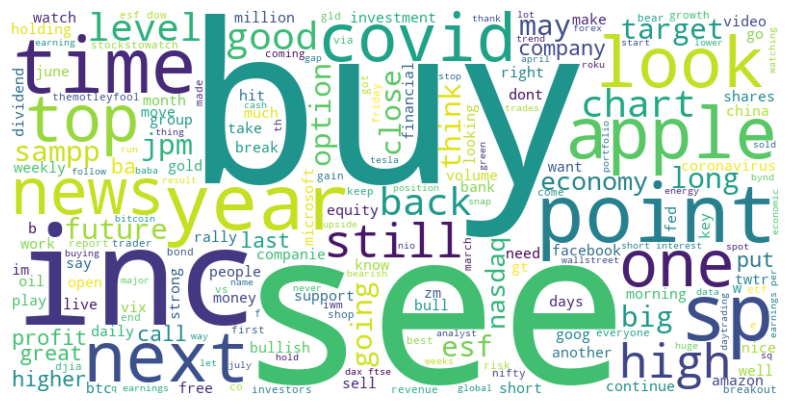

In [242]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the Series to a single string
text_string = " ".join(tweet_data['Text_Cleaned'].dropna())  # Drop NaN values if any

# Generate the word cloud
wordcloud_after_stopword = WordCloud(width=800, height=400, background_color='white').generate(text_string)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_after_stopword, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.show()


### **Tokenize the Text**
Tokenization is the process of splitting text into smaller units, called tokens, which are often individual words. This step is essential for text preprocessing as it enables the analysis of each word separately. For example, the sentence "I love programming!" would be tokenized into ['I', 'love', 'programming', '!'].

In Python, the word_tokenize function from the nltk library is commonly used for this purpose. It efficiently breaks a sentence into tokens, taking care of punctuation and special characters, allowing for precise text analysis.

Split the cleaned text into individual words.

In [243]:

tweet_data['tokens'] = tweet_data['Text_Cleaned'].apply(word_tokenize)

The following code calculates the number of words in each entry of the dataset and identifies the minimum and maximum word counts. This analysis provides a better understanding of the text length distribution, offering valuable insights into the variability of the data prior to further processing.

In [244]:
tweet_data['n_word'] = [len(str(row['tokens']).split()) for _, row in tweet_data.iterrows()]

print(min(tweet_data['n_word']), 
max(tweet_data['n_word']))

1 42


In [245]:
tweet_data.head()

,id,created_at,text,sentiment,Text_Cleaned,tokens,n_word
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive,robertbeadles yo enter win monarch tokens cras...,"[robertbeadles, yo, enter, win, monarch, token...",12
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative,srilanka surcharge fuel removed surcharge rs i...,"[srilanka, surcharge, fuel, removed, surcharge...",25
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive,net issuance increases fund fiscal programs gt...,"[net, issuance, increases, fund, fiscal, progr...",25
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive,bentboolean much amazons traffic served fastly...,"[bentboolean, much, amazons, traffic, served, ...",13
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,ryzen desktop cpus looking great track launch ...,"[ryzen, desktop, cpus, looking, great, track, ...",10


### **Vader sentiment analysis**

After evaluating the sentiment labels for 1,300 rows of data, I noticed that the accuracy of my models was unexpectedly low, around 60%. Based on this observation, I decided not to rely on the existing sentiment labels and instead use VADER to generate sentiment labels for the entire dataset of 5,000 rows. Once the VADER-generated labels are applied, I will proceed to train and evaluate the models on this larger dataset.

In [246]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()


# Function to apply VADER sentiment analysis
def analyze_sentiment(text):
    scores = sia.polarity_scores(text)
    # Return compound score and label
    compound_score = scores["compound"]
    if compound_score >= 0.05:
        sentiment_label = "positive"
    elif compound_score <= -0.05:
        sentiment_label = "negative"
    else:
        sentiment_label = "neutral"
    return pd.Series([compound_score, sentiment_label])

# Apply VADER sentiment analysis to cleaned_text
tweet_data[["vader_score", "vader_sentiment"]] = tweet_data["Text_Cleaned"].apply(analyze_sentiment)




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shokoufeh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [247]:
tweet_data["vader_sentiment"].value_counts()

vader_sentiment
positive    2270
neutral     1902
negative     828
Name: count, dtype: int64

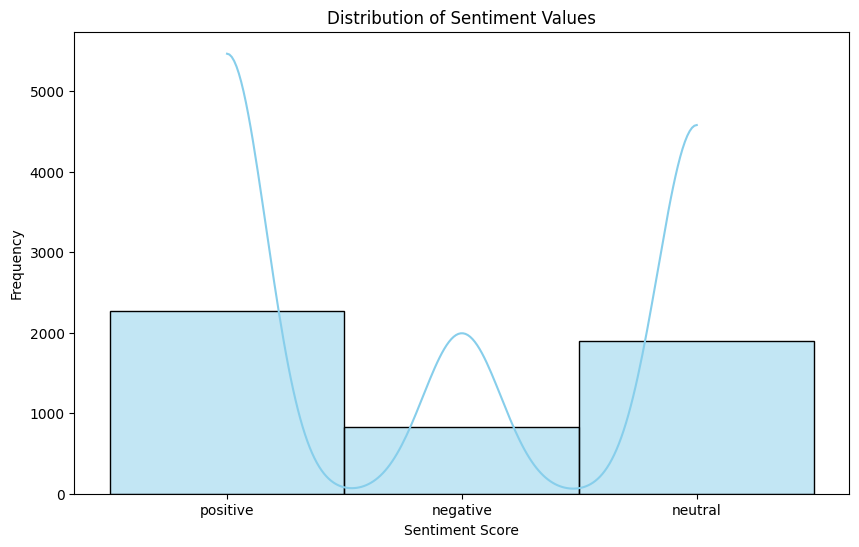

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of the sentiment values
plt.figure(figsize=(10,6))
sns.histplot(tweet_data["vader_sentiment"], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Values')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


### **Comparison of Existing Sentiment Labels with VADER Sentiment**

In [249]:
# Split into labeled and unlabeled data
labeled_data = tweet_data[tweet_data["sentiment"].notna()]
unlabeled_data = tweet_data[tweet_data["sentiment"].isna()]

In [250]:
# Add a new column to indicate whether the sentiments match
labeled_data["comparison"] = labeled_data["sentiment"] == labeled_data["vader_sentiment"]

# Calculate the number of matches
matches = labeled_data["comparison"].sum()

# Calculate total number of rows
total = len(labeled_data)

# Calculate accuracy
accuracy = (matches / total) * 100

print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 68.69%


C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_5692\3118178342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_data["comparison"] = labeled_data["sentiment"] == labeled_data["vader_sentiment"]


C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_5692\3865962907.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_comparison.index, y=sentiment_comparison.values, palette='viridis')


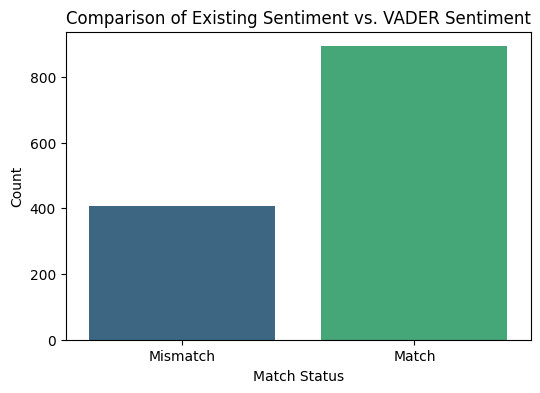

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of matches and mismatches
sentiment_comparison = labeled_data["comparison"].value_counts()

# Plot the comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_comparison.index, y=sentiment_comparison.values, palette='viridis')
plt.title("Comparison of Existing Sentiment vs. VADER Sentiment")
plt.xlabel("Match Status")
plt.ylabel("Count")
plt.xticks([0, 1], ['Mismatch', 'Match'])
plt.show()


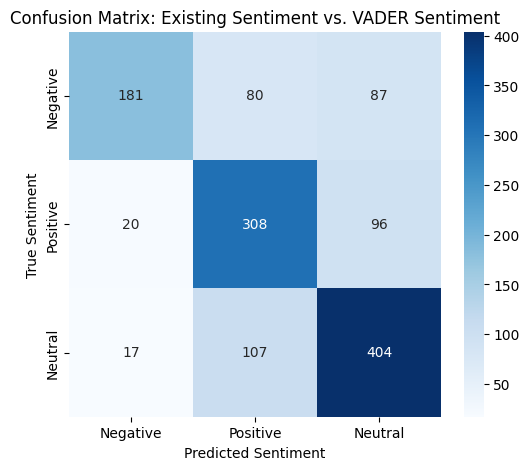

In [252]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(labeled_data["sentiment"], labeled_data["vader_sentiment"])

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive", "Neutral"], yticklabels=["Negative", "Positive", "Neutral"])
plt.title("Confusion Matrix: Existing Sentiment vs. VADER Sentiment")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.show()


As you can see, there are significant differences between the two sentiments. As I mentioned earlier, I will proceed with using VADER sentiment analysis.

### **Encode Sentiment Labels**
Convert sentiment labels (e.g., "positive", "negative") into numeric values for machine learning models.

In [253]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
tweet_data['sentiment_encoded'] = label_encoder.fit_transform(tweet_data['vader_sentiment'])

### **Spliting Data for Modeling**
Split the data into training and testing sets.

In [254]:
from sklearn.model_selection import train_test_split

X = tweet_data['Text_Cleaned']
y = tweet_data['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Vectorize Text Data TF-IDF**
Convert text into numerical form using techniques like TF-IDF or Count Vectorization.

In [255]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


### **Ready for Sentiment Analysis**
We can now use our processed data with machine learning models or sentiment analysis tools.

### **logistic regression model**

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.21      0.34       156
           1       0.69      0.79      0.74       380
           2       0.75      0.85      0.80       464

    accuracy                           0.73      1000
   macro avg       0.77      0.62      0.62      1000
weighted avg       0.75      0.73      0.70      1000



In [190]:
# Create a DataFrame
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

# Print the DataFrame as a table
print(df)

      Predicted  Actual
1501          1       1
2586          1       1
2653          2       2
1055          2       1
705           2       2
...         ...     ...
4711          2       2
2313          2       2
3214          2       2
2732          2       2
1926          1       2

[1000 rows x 2 columns]


C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_5692\1342727105.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Actual', data=df, ax=ax[0], palette='Set2')
C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_5692\1342727105.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=df, ax=ax[1], palette='Set2')


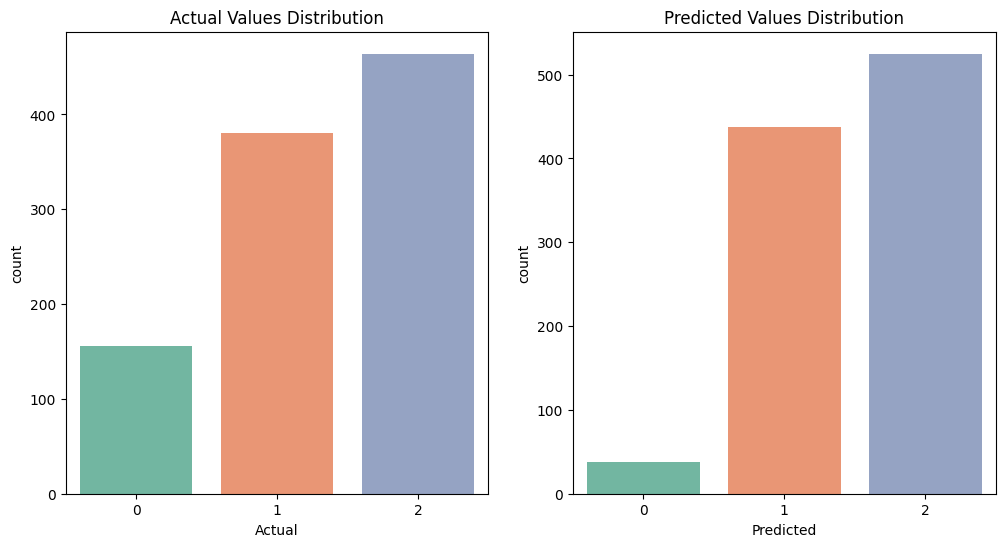

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to compare predicted and actual values
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

# Plotting the counts of each class for Predicted and Actual values
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Actual values
sns.countplot(x='Actual', data=df, ax=ax[0], palette='Set2')
ax[0].set_title('Actual Values Distribution')

# Plot for Predicted values
sns.countplot(x='Predicted', data=df, ax=ax[1], palette='Set2')
ax[1].set_title('Predicted Values Distribution')

plt.show()


This model performs well for positive and neutral sentiments but struggles with negative sentiment due to the limited amount of negative data available. So I try to balance data with over sampling.

#### ***Balancing Target variable using Over Sampling***

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)


In [262]:
from collections import Counter
print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_train_resampled)}")


Original class distribution: Counter({2: 1806, 1: 1522, 0: 672})
Resampled class distribution: Counter({0: 1806, 2: 1806, 1: 1806})


In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.49      0.51       156
           1       0.72      0.80      0.76       380
           2       0.85      0.80      0.82       464

    accuracy                           0.75      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.75      0.75      0.75      1000



C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_5692\1342727105.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Actual', data=df, ax=ax[0], palette='Set2')
C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_5692\1342727105.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=df, ax=ax[1], palette='Set2')


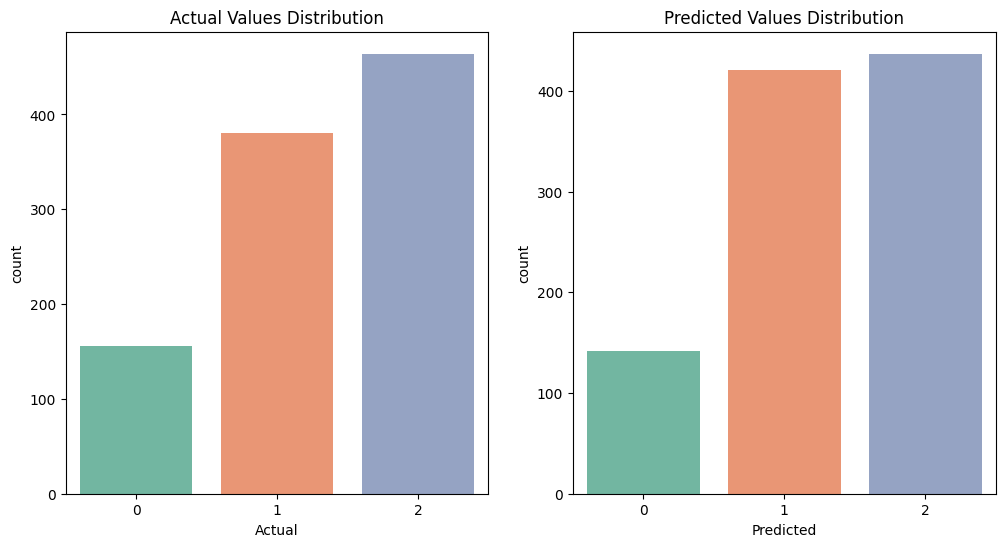

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to compare predicted and actual values
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

# Plotting the counts of each class for Predicted and Actual values
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Actual values
sns.countplot(x='Actual', data=df, ax=ax[0], palette='Set2')
ax[0].set_title('Actual Values Distribution')

# Plot for Predicted values
sns.countplot(x='Predicted', data=df, ax=ax[1], palette='Set2')
ax[1].set_title('Predicted Values Distribution')

plt.show()


After applying class balancing techniques, our sentiment analysis model significantly improved. The overall accuracy increased to 75%, showing a more balanced performance across all sentiment classes.

### ***SVM Classifier***

In [264]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


# Train SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_svm = svm_clf.predict(X_test_tfidf)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.47      0.51       156
           1       0.71      0.86      0.78       380
           2       0.89      0.77      0.82       464

    accuracy                           0.76      1000
   macro avg       0.71      0.70      0.70      1000
weighted avg       0.77      0.76      0.76      1000

SVM Accuracy: 0.758


###  ***Naive Bayes Classifier***

In [266]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_nb = nb_clf.predict(X_test_tfidf)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.57      0.43       156
           1       0.73      0.58      0.64       380
           2       0.76      0.73      0.74       464

    accuracy                           0.65      1000
   macro avg       0.61      0.63      0.61      1000
weighted avg       0.68      0.65      0.66      1000

Naive Bayes Accuracy: 0.646


### **Pre-trained Models**
For advanced analysis, we used transformer-based models like finBERT with libraries such as `transformers` from Hugging Face.

In [30]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [31]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [32]:
# Load the FinBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model_bert = BertForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone", num_labels=3)
model_bert.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [33]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('yiyanghkust/finbert-pretrain')

In [268]:
tweet_data.head()

,id,created_at,text,sentiment,Text_Cleaned,tokens,n_word,vader_score,vader_sentiment,sentiment_encoded
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive,robertbeadles yo enter win monarch tokens cras...,"[robertbeadles, yo, enter, win, monarch, token...",12,0.5859,positive,2
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative,srilanka surcharge fuel removed surcharge rs i...,"[srilanka, surcharge, fuel, removed, surcharge...",25,0.2023,positive,2
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive,net issuance increases fund fiscal programs gt...,"[net, issuance, increases, fund, fiscal, progr...",25,0.0516,positive,2
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive,bentboolean much amazons traffic served fastly...,"[bentboolean, much, amazons, traffic, served, ...",13,0.3818,positive,2
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,ryzen desktop cpus looking great track launch ...,"[ryzen, desktop, cpus, looking, great, track, ...",10,0.6249,positive,2


In [35]:
# Preprocess the data
tweets = tweet_data["Text_Cleaned"].values
labels = tweet_data["sentiment_encoded"].values

In [36]:
# Tokenize the tweets
def encode_tweets(tweets, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for tweet in tweets:
        encoded = tokenizer.encode_plus(
            tweet,
            add_special_tokens=True,
            max_length=max_length,
            truncation=True,
            padding="max_length",
            return_attention_mask=True,
            return_tensors="pt",
        )
        input_ids.append(encoded["input_ids"])
        attention_masks.append(encoded["attention_mask"])

    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)


In [37]:
# Encode tweets
input_ids, attention_masks = encode_tweets(tweets, tokenizer)

In [38]:
# Split into train and test sets
train_inputs, test_inputs, train_masks, test_masks, train_labels, test_labels = train_test_split(
    input_ids, attention_masks, labels, test_size=0.2, random_state=42
)

In [39]:
# Convert to PyTorch tensors
train_inputs = torch.tensor(train_inputs)
test_inputs = torch.tensor(test_inputs)
train_masks = torch.tensor(train_masks)
test_masks = torch.tensor(test_masks)
train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)

C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_5692\217390848.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_inputs = torch.tensor(train_inputs)
C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_5692\217390848.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_inputs = torch.tensor(test_inputs)
C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_5692\217390848.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_masks = torch.tensor(train_masks)
C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_5692\217390848.py:5: UserWarn

In [40]:
# Create DataLoaders
batch_size = 16

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


In [41]:
# Define optimizer and scheduler
optimizer = torch.optim.AdamW(model_bert.parameters(), lr=2e-5, eps=1e-8)
epochs = 4
total_steps = len(train_dataloader) * epochs

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9)

In [42]:
import torch.nn as nn

# Define the loss function
loss_fn = nn.CrossEntropyLoss()


In [43]:
# Training loop
def train():
    model_bert.train()
    for epoch in range(epochs):
        total_loss = 0
        for step, batch in enumerate(train_dataloader):
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device).long()  # Convert labels to LongTensor

            model_bert.zero_grad()
            outputs = model_bert(b_input_ids, attention_mask=b_input_mask)
            logits = outputs.logits

            # Calculate loss
            loss = loss_fn(logits, b_labels)
            total_loss += loss.item()

            # Backpropagation
            loss.backward()
            optimizer.step()
        
        print(f"Epoch {epoch + 1}/{epochs} | Loss: {total_loss / len(train_dataloader)}")
        scheduler.step()


In [44]:
def evaluate():
    model_bert.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in test_dataloader:
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            outputs = model_bert(b_input_ids, attention_mask=b_input_mask)
            logits = outputs.logits
            predictions.append(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.append(b_labels.cpu().numpy())

    predictions = np.concatenate(predictions)
    true_labels = np.concatenate(true_labels)
    print("Accuracy:", accuracy_score(true_labels, predictions))
    print(classification_report(true_labels, predictions, target_names=["Negative", "Neutral", "Positive"]))


In [45]:
# Run training and evaluation
train()
evaluate()

Epoch 1/4 | Loss: 1.0919519007205962
Epoch 2/4 | Loss: 0.63864292126894
Epoch 3/4 | Loss: 0.3373622259497642
Epoch 4/4 | Loss: 0.14139476393349468
Accuracy: 0.787
              precision    recall  f1-score   support

    Negative       0.66      0.60      0.63       156
     Neutral       0.82      0.78      0.80       380
    Positive       0.80      0.86      0.83       464

    accuracy                           0.79      1000
   macro avg       0.76      0.74      0.75      1000
weighted avg       0.79      0.79      0.79      1000



## **onclusion**

In [270]:
import pandas as pd

# Data for models and metrics
data = {
    "Model": [
        "Logistic Regression",
        "SVM",
        "Naive Bayes",
        "FinBERT"
    ],
    "Accuracy": [0.75, 0.76, 0.65, 0.79],
    "Precision (0)": [0.54, 0.55, 0.35, 0.66],
    "Recall (0)": [0.49, 0.47, 0.57, 0.60],
    "F1-Score (0)": [0.51, 0.51, 0.43, 0.63],
    "Precision (1)": [0.72, 0.71, 0.73, 0.82],
    "Recall (1)": [0.80, 0.86, 0.58, 0.78],
    "F1-Score (1)": [0.76, 0.78, 0.64, 0.80],
    "Precision (2)": [0.85, 0.89, 0.76, 0.80],
    "Recall (2)": [0.80, 0.77, 0.73, 0.86],
    "F1-Score (2)": [0.82, 0.82, 0.74, 0.83],
    "Macro Avg F1": [0.70, 0.71, 0.61, 0.74],
    "Weighted Avg F1": [0.75, 0.77, 0.66, 0.79]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Highlight the best model row in purple based on accuracy
def highlight_best(row):
    if row["Accuracy"] == df["Accuracy"].max():  # Highlight the row with the highest Accuracy
        return ['background-color: purple; color: white'] * len(row)
    else:
        return [''] * len(row)

# Apply the highlighting
styled_df = df.style.apply(highlight_best, axis=1)

# Display the styled DataFrame
styled_df


,Model,Accuracy,Precision (0),Recall (0),F1-Score (0),Precision (1),Recall (1),F1-Score (1),Precision (2),Recall (2),F1-Score (2),Macro Avg F1,Weighted Avg F1
0,Logistic Regression,0.750000,0.540000,0.490000,0.510000,0.720000,0.800000,0.760000,0.850000,0.800000,0.820000,0.700000,0.750000
1,SVM,0.760000,0.550000,0.470000,0.510000,0.710000,0.860000,0.780000,0.890000,0.770000,0.820000,0.710000,0.770000
2,Naive Bayes,0.650000,0.350000,0.570000,0.430000,0.730000,0.580000,0.640000,0.760000,0.730000,0.740000,0.610000,0.660000
3,FinBERT,0.790000,0.660000,0.600000,0.630000,0.820000,0.780000,0.800000,0.800000,0.860000,0.830000,0.740000,0.790000


Based on the evaluation results of the models, we can conclude the following:

FinBERT achieved the highest performance with an accuracy of 0.79 and the best F1-scores for both positive and neutral classes. It also demonstrated a good balance between precision, recall, and F1-score, making it the best-performing model for this sentiment analysis task. This performance is particularly notable for the positive class, where both precision and recall are high, indicating its strong ability to identify positive sentiments.

SVM also performed well, with an accuracy of 0.76. It showed slightly higher precision and recall for the neutral and positive classes, but its performance for the negative class was not as strong as FinBERT’s, suggesting it may struggle with negative sentiment classification.

Logistic Regression demonstrated an accuracy of 0.75, with solid performance across the classes, but it was outperformed by both FinBERT and SVM, especially in the positive and neutral classes. Its precision and recall for the negative class were lower compared to other models.

Naive Bayes had the lowest performance, with an accuracy of 0.65. It struggled particularly with negative sentiment classification, as seen in its lower recall for this class. While it had reasonable results for the positive and neutral classes, its overall performance was weaker compared to the other models.

Overall, FinBERT emerged as the best model, particularly for the positive sentiment, and would be the preferred choice for this sentiment analysis task. The other models, SVM and Logistic Regression, also showed promising results, with SVM performing slightly better in the neutral class and Logistic Regression providing solid performance across all classes. Naive Bayes, while useful in certain contexts, is less effective for this task.